Accessing the Dataset

In [ ]:
import pandas_datareader.data as web
import datetime

# Define the date range
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2025, 1, 1)

# Get the data from FRED
treasury_yield = web.DataReader("GS10", "fred", start, end)

# Save it as a CSV file
treasury_yield.to_csv('10_year_treasury_yield.csv')

Inspect Data

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('10_year_treasury_yield.csv', parse_dates=['DATE'], index_col='DATE')

# Check the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

            GS10
DATE            
2000-01-01  6.66
2000-02-01  6.52
2000-03-01  6.26
2000-04-01  5.99
2000-05-01  6.44
GS10    0
dtype: int64


Cleaning the Data


In [ ]:
# Forward fill missing data
data = data.fillna(method='ffill')

# Drop rows with NaN values (if necessary)
# data = data.dropna()

<ipython-input-3-d76978500eea>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [ ]:
# Resample data monthly, using the mean of the month's data
monthly_data = data.resample('M').mean()

<ipython-input-4-138dfec84068>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


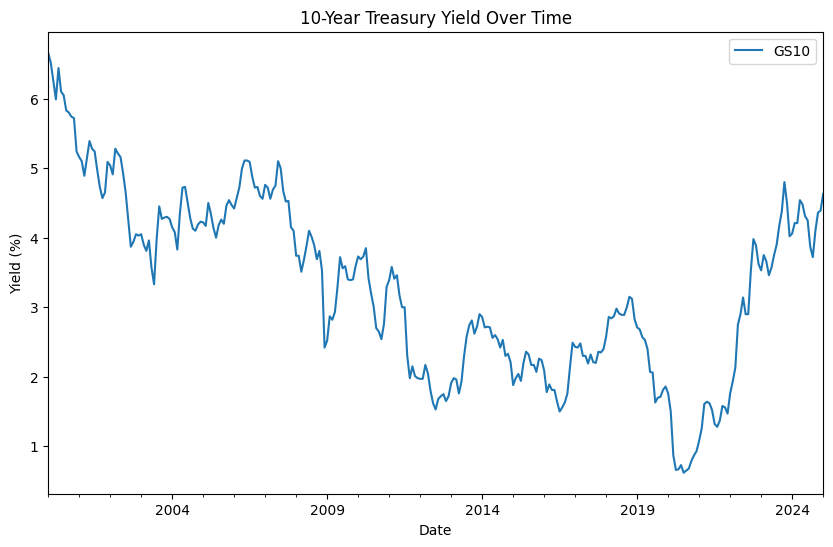

In [ ]:
import matplotlib.pyplot as plt

data.plot(figsize=(10, 6))
plt.title("10-Year Treasury Yield Over Time")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.show()

Trend Analysis

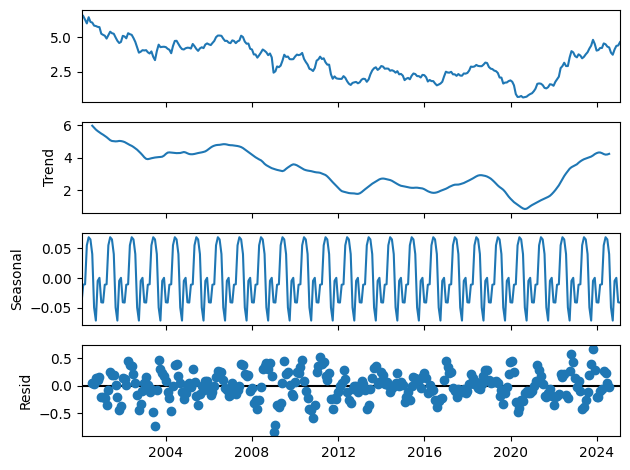

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_data, model='additive')
decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_data['GS10'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, the series is non-stationary, and differencing is required

ADF Statistic: -2.3073711244785122
p-value: 0.16960165714876668


ARIMA Model Setup

In [ ]:
# Differencing the series
diff_data = monthly_data.diff().dropna()

# Check if the series is now stationary
result = adfuller(diff_data['GS10'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -11.99960461049349
p-value: 3.370649738533838e-22


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

model = auto_arima(monthly_data['GS10'], seasonal=False, stepwise=True, trace=True)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-75.614, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-59.618, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-75.497, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-79.916, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-61.328, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-79.204, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-79.257, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-77.408, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-81.739, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-81.003, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-81.050, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-77.325, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-79.165, Time=0.36 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.917 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  301
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  42.870
Date:                Fri, 14 Feb 2025   AIC                            -81.739
Time:                        13:49:37   BIC                            -74.332
Sample:                    01-31-2000   HQIC                           -78.775
                         - 01-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2997      0.049      6.128      0.000       0.204  

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the best ARIMA model selected by auto_arima
model = ARIMA(monthly_data['GS10'], order=(0, 1, 1))
model_fit = model.fit()

# Display the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   GS10   No. Observations:                  301
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  42.870
Date:                Fri, 14 Feb 2025   AIC                            -81.739
Time:                        13:49:41   BIC                            -74.332
Sample:                    01-31-2000   HQIC                           -78.775
                         - 01-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2997      0.049      6.128      0.000       0.204       0.396
sigma2         0.0440      0.003     16.872      0.000       0.039       0.049
Ljung-Box (L1) (Q):                   0.12   Jarque-

Forecasting and Comparison

In [ ]:
# Forecast the next 12 months
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Display forecast values
print("Forecasted Values:")
print(forecast_mean)

Forecasted Values:
2025-02-28    4.703077
2025-03-31    4.703077
2025-04-30    4.703077
2025-05-31    4.703077
2025-06-30    4.703077
2025-07-31    4.703077
2025-08-31    4.703077
2025-09-30    4.703077
2025-10-31    4.703077
2025-11-30    4.703077
2025-12-31    4.703077
2026-01-31    4.703077
Freq: ME, Name: predicted_mean, dtype: float64


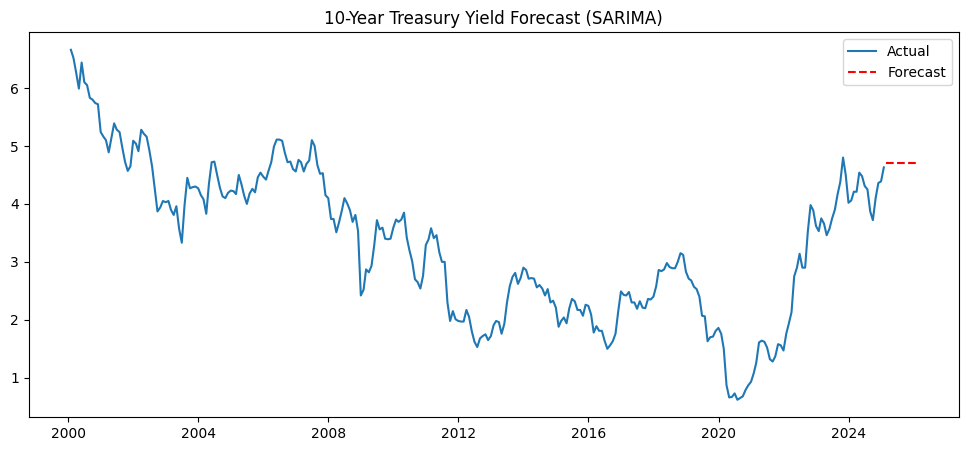

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

forecast_df = pd.DataFrame({'Forecast': forecast_mean}, index=forecast_index)

plt.figure(figsize=(12, 5))
plt.plot(monthly_data['GS10'], label='Actual')
plt.plot(forecast_df, label='Forecast', linestyle='dashed', color='red')
plt.title("10-Year Treasury Yield Forecast (SARIMA)")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Forecast vs actuals on test data
test_data = monthly_data['GS10'][-forecast_steps:]  # Example: Replace with your test set
mae = mean_absolute_error(test_data, forecast_mean)
rmse = np.sqrt(mean_squared_error(test_data, forecast_mean))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.4472
Root Mean Squared Error (RMSE): 0.5138


Visualization and Insights

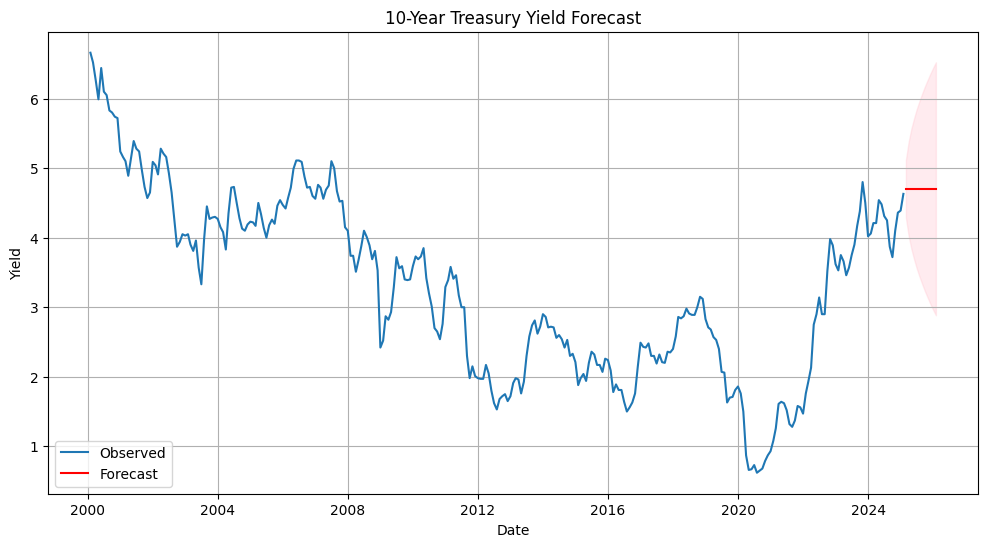

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['GS10'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_mean.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.title('10-Year Treasury Yield Forecast')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()

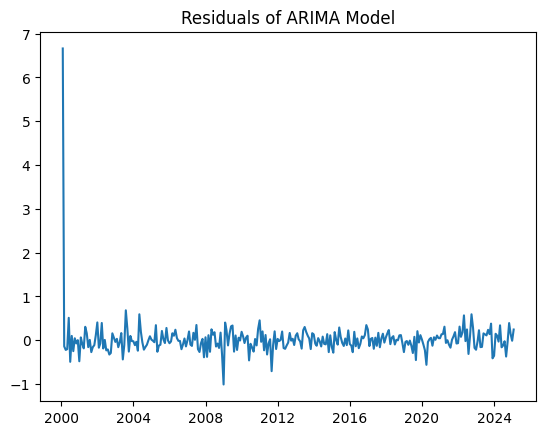

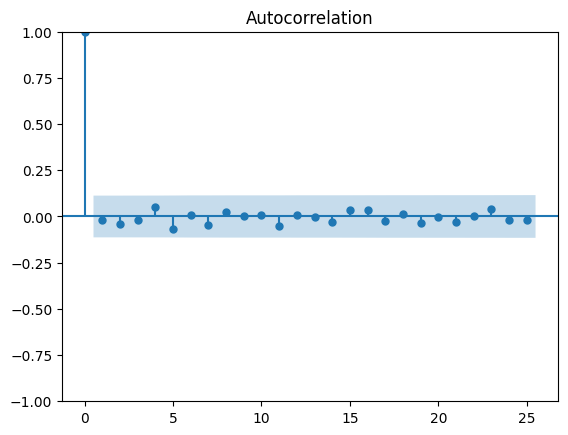

In [ ]:
residuals = model_fit.resid
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

# Check ACF (Autocorrelation) of residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()

ARIMA Vs SARIMAX

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your data (assuming 'treasury_yield.csv' has 'DATE' as the index and 'GS10' as the values)
df = pd.read_csv('10_year_treasury_yield.csv', index_col='DATE', parse_dates=True)
y_data = df['GS10']

# Function to calculate MAPE (with a small constant to avoid division by zero)
def robust_mape(y_true, y_pred):
    epsilon = 1e-5  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Scale the data using StandardScaler
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y_data.values.reshape(-1, 1))

# Split the data into training and test sets
train_size = len(y_scaled) - 12  # Last 12 months for testing
y_train = y_scaled[:train_size]
y_test = y_scaled[train_size:]

# Train ARIMA model
arima_model = ARIMA(y_train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Train SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()

# Train Holt-Winters Exponential Smoothing model
holt_winters_model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)
holt_winters_model_fit = holt_winters_model.fit()

# Forecasting with ARIMA, SARIMA, and Holt-Winters
arima_forecast_scaled = arima_model_fit.forecast(steps=12)
sarima_forecast_scaled = sarima_model_fit.forecast(steps=12)
holt_winters_forecast_scaled = holt_winters_model_fit.forecast(steps=12)

# Inverse transform the forecasted data
arima_forecast = scaler.inverse_transform(arima_forecast_scaled.reshape(-1, 1))
sarima_forecast = scaler.inverse_transform(sarima_forecast_scaled.reshape(-1, 1))
holt_winters_forecast = scaler.inverse_transform(holt_winters_forecast_scaled.reshape(-1, 1))

# Inverse transform y_test
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the forecast performance for ARIMA, SARIMA, and Holt-Winters
arima_mae = mean_absolute_error(y_test_inv, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(y_test_inv, arima_forecast))
arima_mape = robust_mape(y_test_inv, arima_forecast)

sarima_mae = mean_absolute_error(y_test_inv, sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(y_test_inv, sarima_forecast))
sarima_mape = robust_mape(y_test_inv, sarima_forecast)

holt_winters_mae = mean_absolute_error(y_test_inv, holt_winters_forecast)
holt_winters_rmse = np.sqrt(mean_squared_error(y_test_inv, holt_winters_forecast))
holt_winters_mape = robust_mape(y_test_inv, holt_winters_forecast)

# Print the results
print(f"ARIMA MAE: {arima_mae:.4f}, ARIMA RMSE: {arima_rmse:.4f}, ARIMA MAPE: {arima_mape:.2f}%")
print(f"SARIMA MAE: {sarima_mae:.4f}, SARIMA RMSE: {sarima_rmse:.4f}, SARIMA MAPE: {sarima_mape:.2f}%")
print(f"Holt-Winters MAE: {holt_winters_mae:.4f}, Holt-Winters RMSE: {holt_winters_rmse:.4f}, Holt-Winters MAPE: {holt_winters_mape:.2f}%")


ARIMA MAE: 0.2583, ARIMA RMSE: 0.2979, ARIMA MAPE: 6.02%
SARIMA MAE: 0.2310, SARIMA RMSE: 0.2672, SARIMA MAPE: 5.40%
Holt-Winters MAE: 0.2818, Holt-Winters RMSE: 0.3286, Holt-Winters MAPE: 6.47%


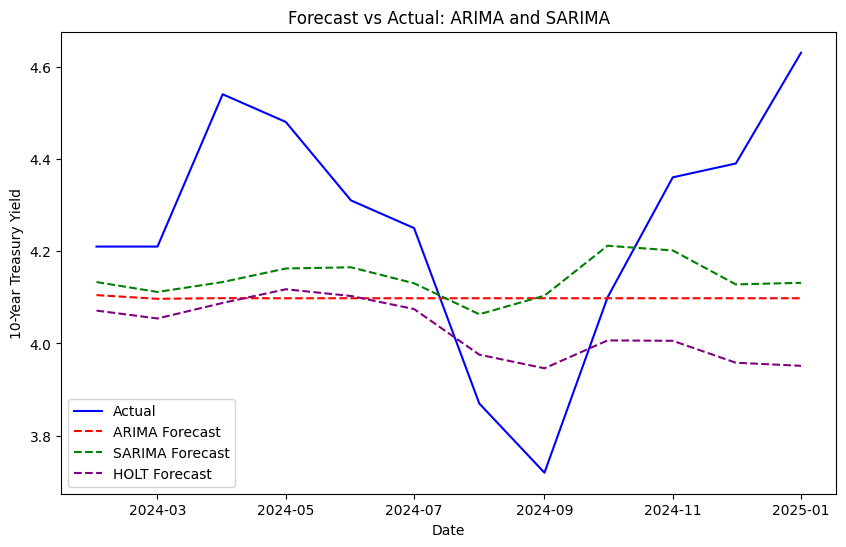

In [ ]:
# Plot the forecast vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_data.index[-12:], y_test_inv, label='Actual', color='blue')
plt.plot(y_data.index[-12:], arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(y_data.index[-12:], sarima_forecast, label='SARIMA Forecast', color='green', linestyle='--')
plt.plot(y_data.index[-12:], holt_winters_forecast, label='HOLT Forecast', color='purple', linestyle='--')
plt.xlabel('Date')
plt.ylabel('10-Year Treasury Yield')
plt.legend()
plt.title('Forecast vs Actual: ARIMA and SARIMA')
plt.show()
